In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

%matplotlib inline
plt.style.use('ggplot')

In [2]:
plt.rcParams["figure.figsize"] = (18,6)
sns.set_palette("husl")
ESTILO = "background-color:lightgrey; display:inline"

In [3]:
def dropear_columnas(dataset, columnas):
    return dataset.drop(columnas, axis = 1)

In [4]:
df_raw = pd.read_csv("data\diabetic_data.csv")

# Vista del Dataset: Head/Tail

In [5]:
display(df_raw.head())
display(HTML('<br><hr><br>'))
display(df_raw.tail())

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101765,443867222,175429310,Caucasian,Male,[70-80),?,1,1,7,6,...,No,No,No,No,No,No,No,No,No,NO


In [6]:
df_raw = dropear_columnas(df_raw, ['encounter_id', 'patient_nbr'])

# Información sobre el Dataset

In [7]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      101766 non-null  object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    101766 non-null  object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                101766 non-null  object
 9   medical_specialty         101766 non-null  object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

# Descripción del Dataset

In [8]:
display(df_raw.describe().T)
display(df_raw.describe(include=[object]))

,count,mean,std,min,25%,50%,75%,max
admission_type_id,101766.0,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0


,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,6,3,10,10,18,73,717,749,790,4,...,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),?,?,?,428,276,250,None,...,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,98569,40256,49949,6862,6752,11555,96420,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


# Comprobación de Nulos

In [9]:
df_raw.isnull().sum()

race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

# EDA Univariable

In [59]:
columnas_cat     = []
columnas_dropear = []
columnas_num     = []

## Race

In [11]:
display(df_raw['race'].value_counts(normalize=True))

Caucasian          0.747784
AfricanAmerican    0.188766
?                  0.022336
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: race, dtype: float64

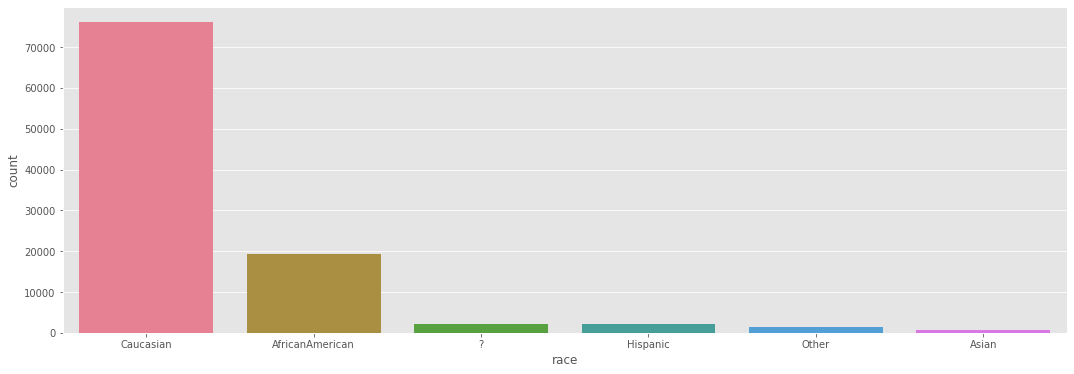

In [12]:
sns.countplot(x=df_raw['race'], 
              order = df_raw['race'].value_counts().index);

In [13]:
columnas_cat.append('race')

## Gender

In [14]:
display(df_raw['gender'].value_counts())

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [15]:
columnas_cat.append('gender')

## Age

In [16]:
display(df_raw['age'].value_counts(normalize=True))

[70-80)     0.256156
[60-70)     0.220928
[50-60)     0.169565
[80-90)     0.168986
[40-50)     0.095169
[30-40)     0.037095
[90-100)    0.027445
[20-30)     0.016282
[10-20)     0.006790
[0-10)      0.001582
Name: age, dtype: float64

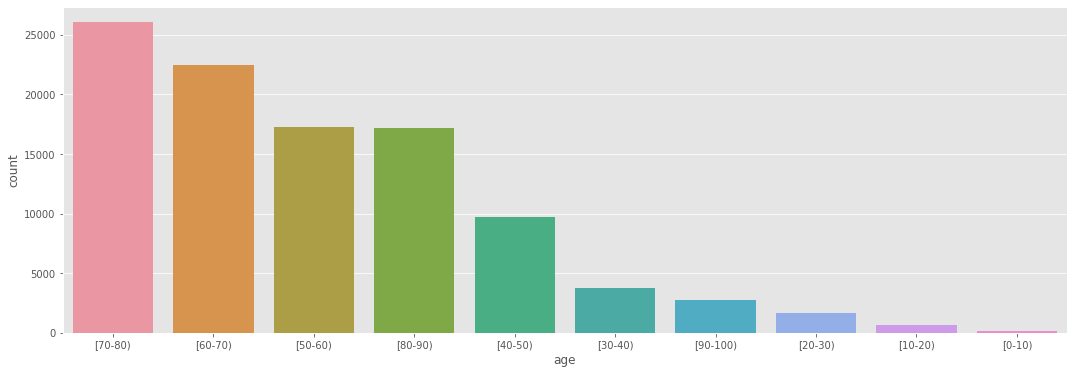

In [17]:
sns.countplot(x=df_raw['age'], 
              order = df_raw['age'].value_counts().index);

In [18]:
columnas_cat.append('age')

## Weight

In [19]:
display(df_raw['weight'].value_counts(normalize=True))

?            0.968585
[75-100)     0.013128
[50-75)      0.008814
[100-125)    0.006142
[125-150)    0.001425
[25-50)      0.000953
[0-25)       0.000472
[150-175)    0.000344
[175-200)    0.000108
>200         0.000029
Name: weight, dtype: float64

In [20]:
columnas_dropear.append('weight')

## Admission type id

In [21]:
display(df_raw['admission_type_id'].value_counts(normalize=True))

1    0.530531
3    0.185416
2    0.181593
6    0.051992
5    0.047020
8    0.003144
7    0.000206
4    0.000098
Name: admission_type_id, dtype: float64

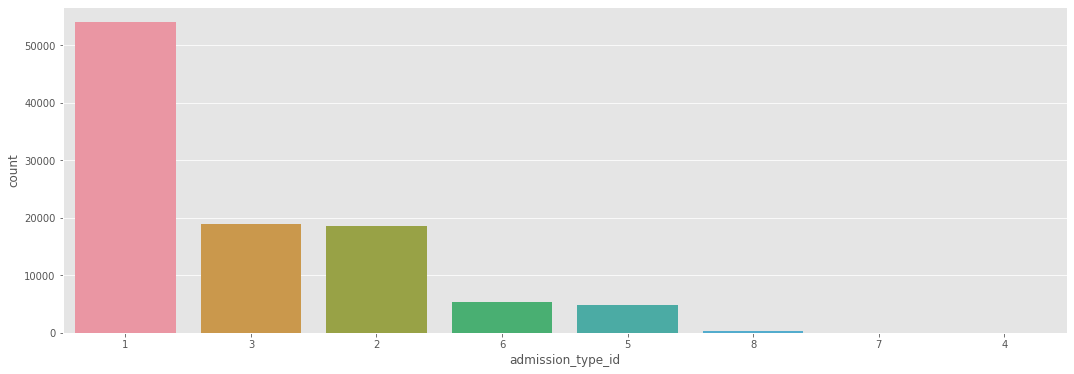

In [22]:
sns.countplot(x=df_raw['admission_type_id'], 
              order = df_raw['admission_type_id'].value_counts().index);

In [23]:
columnas_cat.append('admission_type_id')

## Discharge disposition id

In [24]:
display(df_raw['discharge_disposition_id'].value_counts())

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

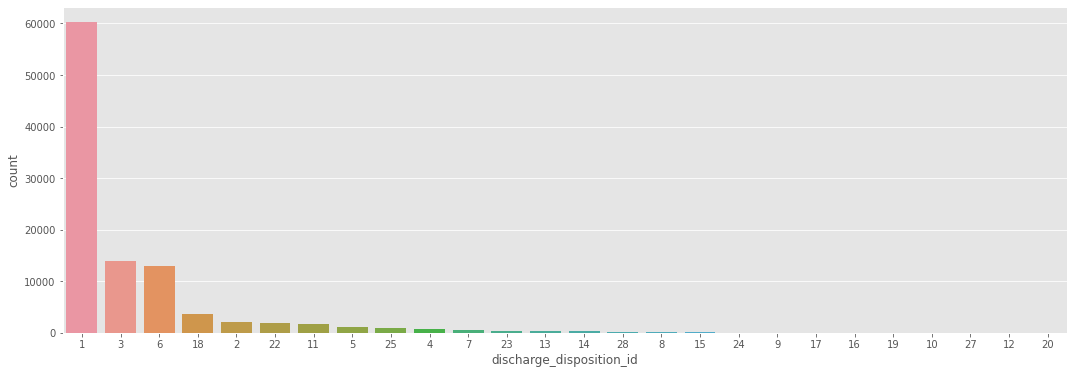

In [25]:
sns.countplot(x=df_raw['discharge_disposition_id'], 
              order = df_raw['discharge_disposition_id'].value_counts().index);

In [26]:
columnas_cat.append('discharge_disposition_id')

## Admission source id

In [27]:
display(df_raw['admission_source_id'].value_counts(normalize=True))

7     0.564963
1     0.290519
17    0.066633
4     0.031317
6     0.022247
2     0.010848
5     0.008402
3     0.001838
20    0.001582
9     0.001228
8     0.000157
22    0.000118
10    0.000079
11    0.000020
14    0.000020
25    0.000020
13    0.000010
Name: admission_source_id, dtype: float64

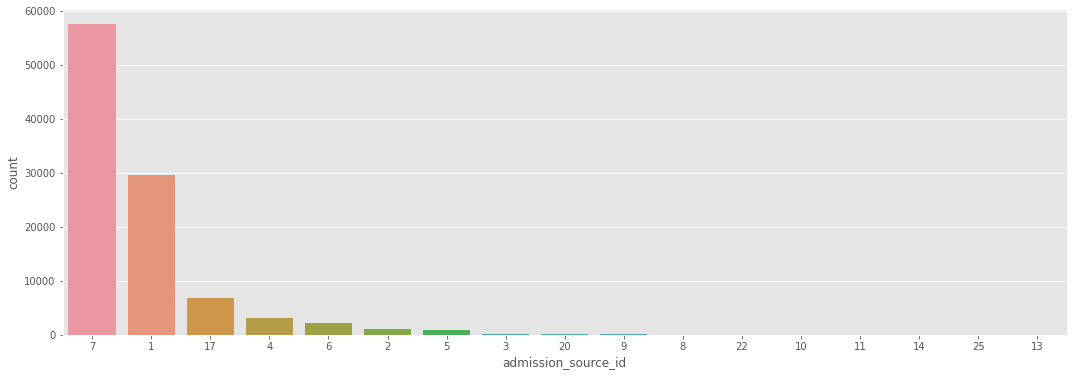

In [28]:
sns.countplot(x=df_raw['admission_source_id'], 
              order = df_raw['admission_source_id'].value_counts().index);

In [29]:
columnas_cat.append('admission_source_id')

## Time in Hospital

In [30]:
display(df_raw['time_in_hospital'].value_counts(normalize=True))

3     0.174479
2     0.169251
1     0.139614
4     0.136824
5     0.097931
6     0.074082
7     0.057573
8     0.043148
9     0.029499
10    0.023014
11    0.018228
12    0.014229
13    0.011890
14    0.010239
Name: time_in_hospital, dtype: float64

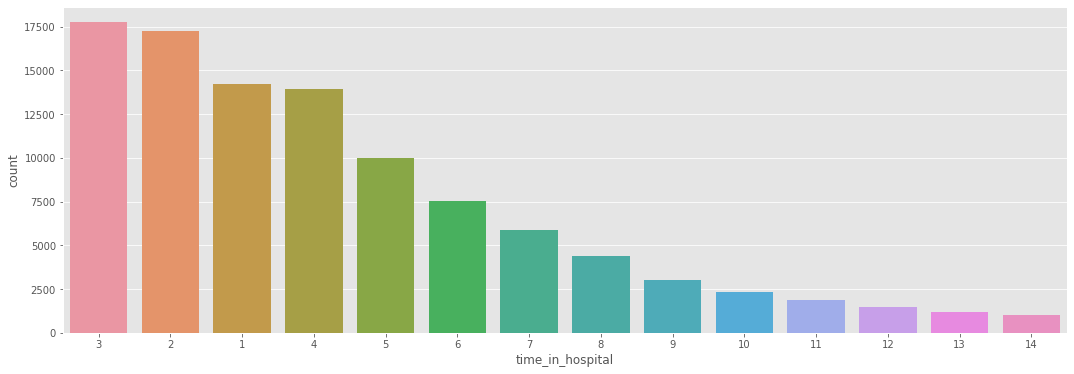

In [31]:
sns.countplot(x=df_raw['time_in_hospital'], 
              order = df_raw['time_in_hospital'].value_counts().index);

In [32]:
columnas_cat.append('time_in_hospital')

## Payer code

In [33]:
display(df_raw['payer_code'].value_counts(normalize=True))

?     0.395574
MC    0.318761
HM    0.061651
SP    0.049201
BC    0.045742
MD    0.034707
CP    0.024890
UN    0.024055
CM    0.019034
OG    0.010151
PO    0.005817
DM    0.005395
CH    0.001435
WC    0.001327
OT    0.000934
MP    0.000776
SI    0.000540
FR    0.000010
Name: payer_code, dtype: float64

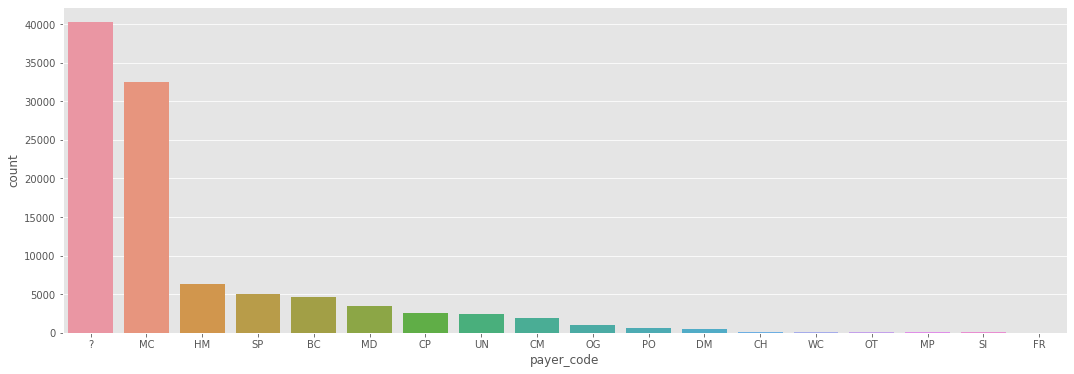

In [34]:
sns.countplot(x=df_raw['payer_code'], 
              order = df_raw['payer_code'].value_counts().index);

In [ ]:
columnas_cat.append('payer_code')

## Medical Specialty         

In [39]:
display(df_raw['medical_specialty'].value_counts(normalize=True))

?                                   0.490822
InternalMedicine                    0.143810
Emergency/Trauma                    0.074337
Family/GeneralPractice              0.073109
Cardiology                          0.052591
                                      ...   
Neurophysiology                     0.000010
Surgery-PlasticwithinHeadandNeck    0.000010
Proctology                          0.000010
Pediatrics-InfectiousDiseases       0.000010
Dermatology                         0.000010
Name: medical_specialty, Length: 73, dtype: float64

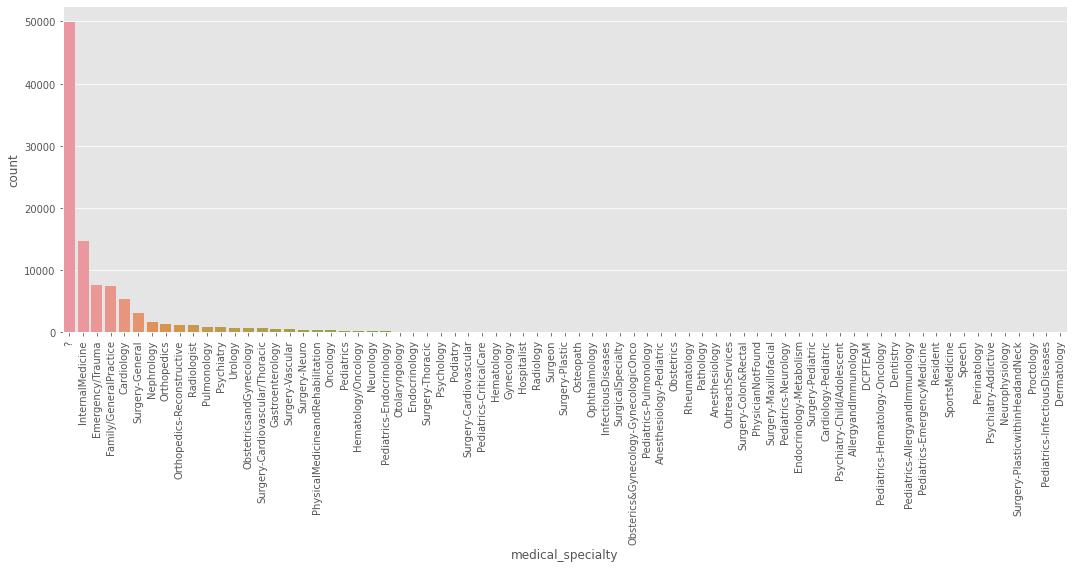

In [42]:
sns.countplot(x=df_raw['medical_specialty'], 
              order = df_raw['medical_specialty'].value_counts().index);
plt.xticks(rotation = 90);

In [ ]:
columnas_dropear.append('medical_specialty')

## N° Lab Procedures 

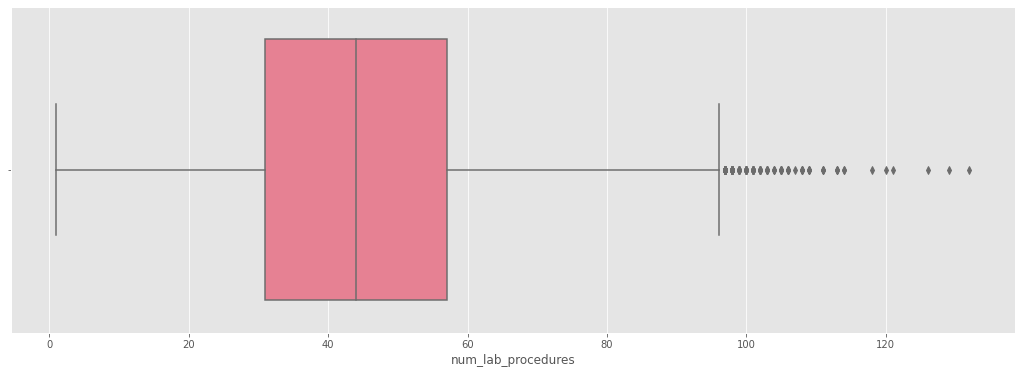

In [58]:
sns.boxplot(x=df_raw['num_lab_procedures']);

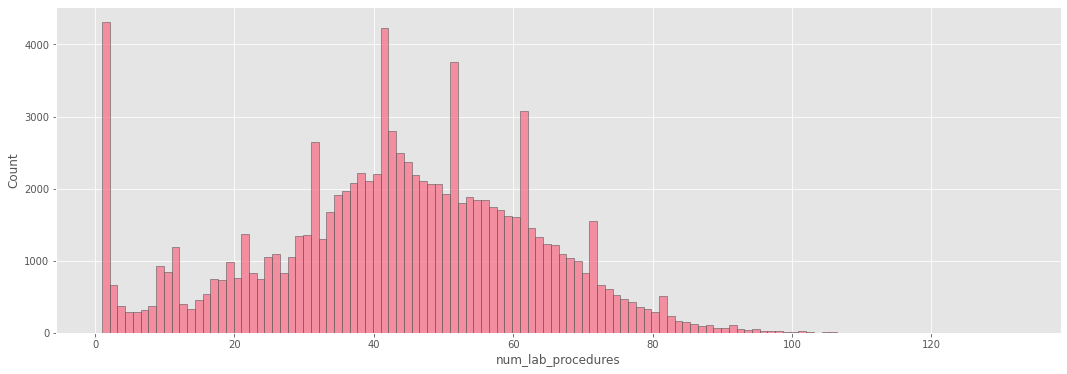

In [57]:
sns.histplot(
    df_raw,
    x="num_lab_procedures",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
);

## N° Procedures

In [64]:
display(df_raw['num_procedures'].value_counts(normalize=True))

0    0.458424
1    0.203821
2    0.124963
3    0.092791
6    0.048680
4    0.041075
5    0.030246
Name: num_procedures, dtype: float64

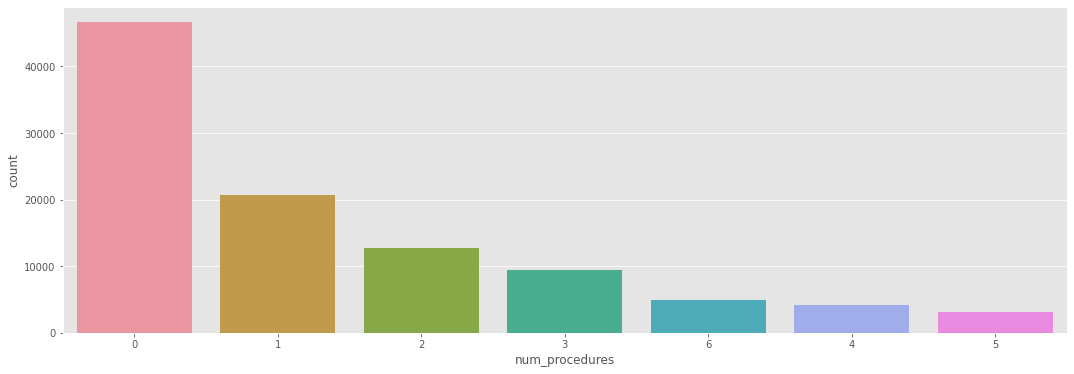

In [63]:
sns.countplot(x=df_raw['num_procedures'], 
              order = df_raw['num_procedures'].value_counts().index);

In [65]:
columnas_cat.append('num_procedures')

## N° Medications 

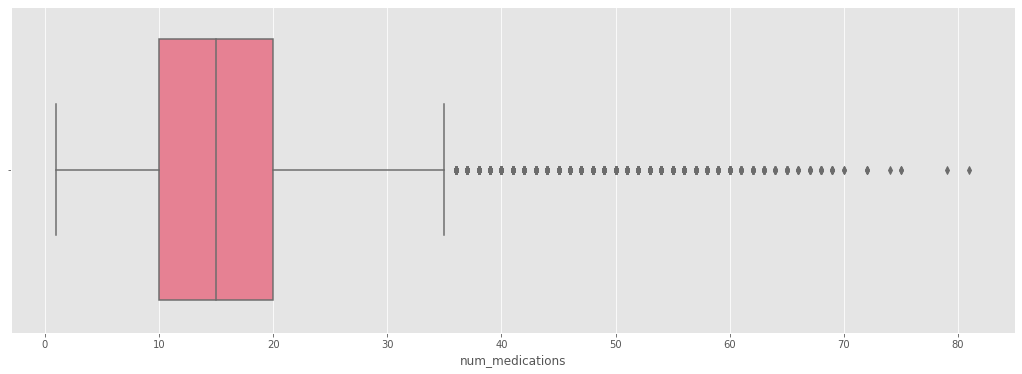

In [67]:
sns.boxplot(x=df_raw['num_medications']);

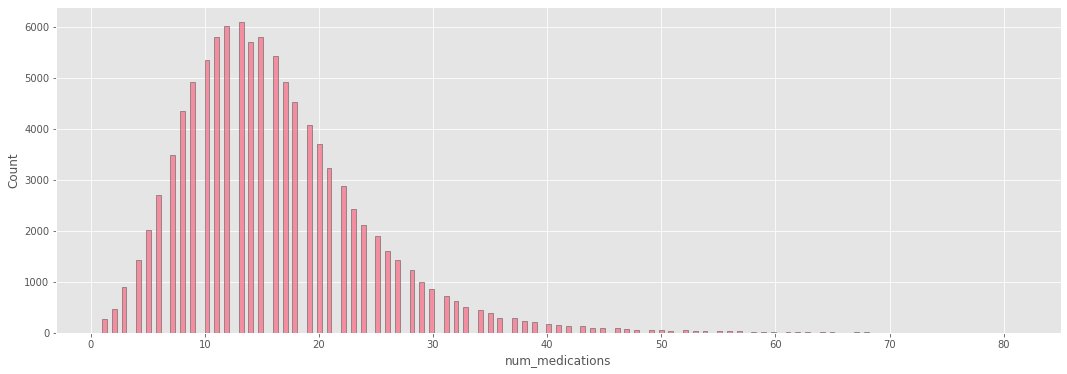

In [68]:
sns.histplot(
    df_raw,
    x="num_medications",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
);

In [ ]:
columnas_num.append("num_medications")